In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored
import copy

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# OBS Datapoints start the 23/03 - 2022 - 00:00

In [44]:
import os
import pandas as pd

Emil = True

if Emil:
    base_path = r"C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90"
else:
    base_path = r"C:\Users\Gustav\Documents\Thesis\data\EV\cleaned_data_RM90"



In [3]:
EV1 = pd.read_csv(os.path.join(base_path, "CD_1544.csv"))
EV2 = pd.read_csv(os.path.join(base_path, "CD_2067.csv"))

In [4]:
EV1.head(3)

energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
0                  0.0        0.0        0.0                 0.0  \
1                  0.0        0.0        0.0                 0.0   
2                  0.0        0.0        0.0                 0.0   

   max_effect of charger (kW)  minute of year  
0                        14.4             1.0  
1                        14.4             2.0  
2                        14.4             3.0

In [5]:
len(EV1)

525600

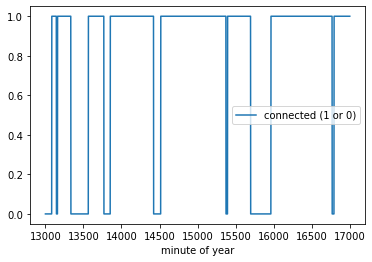

In [6]:
EV1[13000:17000].plot(x="minute of year", y="connected (1 or 0)");

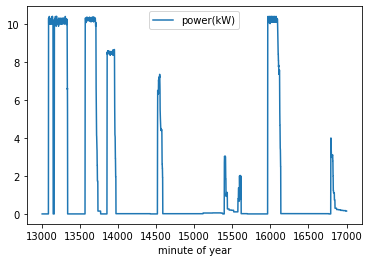

In [7]:
EV1[13000:17000].plot(x="minute of year", y="power(kW)");

In [8]:
# til at lave de op og nedregulerings bounds

liste_up = []
liste_down = []

for i in range(15392, 15697):
    if EV1['power(kW)'][i] == 0:
        liste_up.append(0)
        liste_down.append(0)
    elif EV1['power(kW)'][i] <= EV1['max_effect of charger (kW)'][i]-EV1['power(kW)'][i]:
        liste_up.append(EV1['power(kW)'][i]*5)
        liste_down.append(0)
    else:
        liste_up.append(EV1['power(kW)'][i])
        liste_down.append(EV1['power(kW)'][i]*5)


In [9]:
len(liste_up)

305

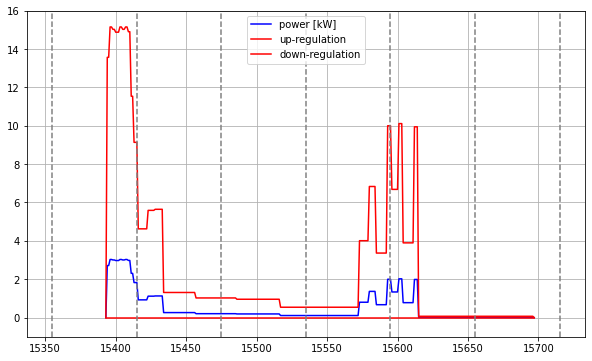

In [10]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values
y2 = EV1[15392:15697]["energy_resovior (%)"].values
y3 = EV1[15392:15697]["connected (1 or 0)"].values

plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='power [kW]', color='blue')
#plt.plot(x, y2*10, label='energy_resovior (%)', color='green')
#plt.plot(x, y3, label='conncted', color='yellow')
plt.plot(x, liste_up, label='up-regulation', color='red')
plt.plot(x, liste_down, label='down-regulation', color='red')


# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15355, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)
#plt.axvline(x=15392, color='yellow', linestyle='-')
#plt.axvline(x=15697, color='yellow', linestyle='-')

# Show the plot
plt.grid(True)
plt.show()

The assumption is that a car will have 20% capacity when it connects to the charger and 80% when it's done.

It's also assumed that the operator is allowed to operate the battery between the battery capacity threshold 10-90% 

## Til møde 13/9

# plot 1

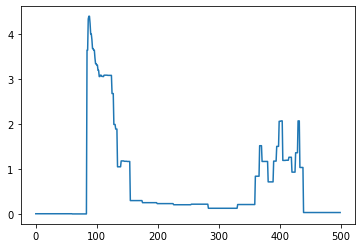

In [11]:
plt.plot(EV1[488100:488600]["power(kW)"].values)

In [12]:
print("1st hour interval: Max_power:", max(EV1[15360:15420]['power(kW)']), ", Min_power:", min(EV1[15360:15420]['power(kW)'])) 
print("2nd hour interval: Max_power:", max(EV1[15420:15480]['power(kW)']), ", Min_power:", min(EV1[15420:15480]['power(kW)']))
print("3rd hour interval: Max_power:", max(EV1[15480:15540]['power(kW)']), ", Min_power:", min(EV1[15480:15540]['power(kW)'])) 
print("4th hour interval: Max_power:", max(EV1[15540:15600]['power(kW)']), ", Min_power:", min(EV1[15540:15600]['power(kW)'])) 
print("5th hour interval: Max_power:", max(EV1[15600:15660]['power(kW)']), ", Min_power:", min(EV1[15600:15660]['power(kW)'])) 
print("6th hour interval: Max_power:", max(EV1[15660:15720]['power(kW)']), ", Min_power:", min(EV1[15660:15720]['power(kW)'])) 

1st hour interval: Max_power: 3.0299999939428197 , Min_power: 0.0
2nd hour interval: Max_power: 1.1291925443257127 , Min_power: 0.2050113891116065
3rd hour interval: Max_power: 0.2050113891116065 , Min_power: 0.10823812365604
4th hour interval: Max_power: 1.9999999959994377 , Min_power: 0.10823812365604
5th hour interval: Max_power: 2.022471906066944 , Min_power: 0.0138517618191978
6th hour interval: Max_power: 0.0138517618191978 , Min_power: 0.0


In [13]:
print("1st hour interval: Max_power:", EV1[15360:15420]['power(kW)'].idxmax(), ", Min_power:", EV1[15360:15420]['power(kW)'].idxmin()) 
print("2nd hour interval: Max_power:", EV1[15420:15480]['power(kW)'].idxmax(), ", Min_power:", EV1[15420:15480]['power(kW)'].idxmin())
print("3rd hour interval: Max_power:", EV1[15480:15540]['power(kW)'].idxmax(), ", Min_power:", EV1[15480:15540]['power(kW)'].idxmin()) 
print("4th hour interval: Max_power:", EV1[15540:15600]['power(kW)'].idxmax(), ", Min_power:", EV1[15540:15600]['power(kW)'].idxmin()) 
print("5th hour interval: Max_power:", EV1[15600:15660]['power(kW)'].idxmax(), ", Min_power:", EV1[15600:15660]['power(kW)'].idxmin()) 
print("6th hour interval: Max_power:", EV1[15660:15720]['power(kW)'].idxmax(), ", Min_power:", EV1[15660:15720]['power(kW)'].idxmin()) 

1st hour interval: Max_power: 15402 , Min_power: 15372
2nd hour interval: Max_power: 15427 , Min_power: 15456
3rd hour interval: Max_power: 15480 , Min_power: 15516
4th hour interval: Max_power: 15592 , Min_power: 15540
5th hour interval: Max_power: 15600 , Min_power: 15614
6th hour interval: Max_power: 15660 , Min_power: 15696


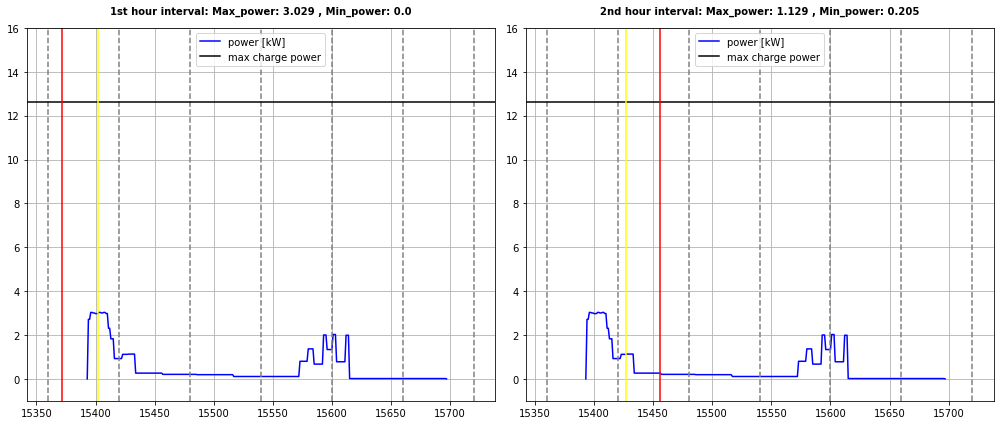

In [14]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15360:15420]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15360:15420]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15420:15480]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15420:15480]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("2nd hour interval: Max_power: 1.129 , Min_power: 0.205", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

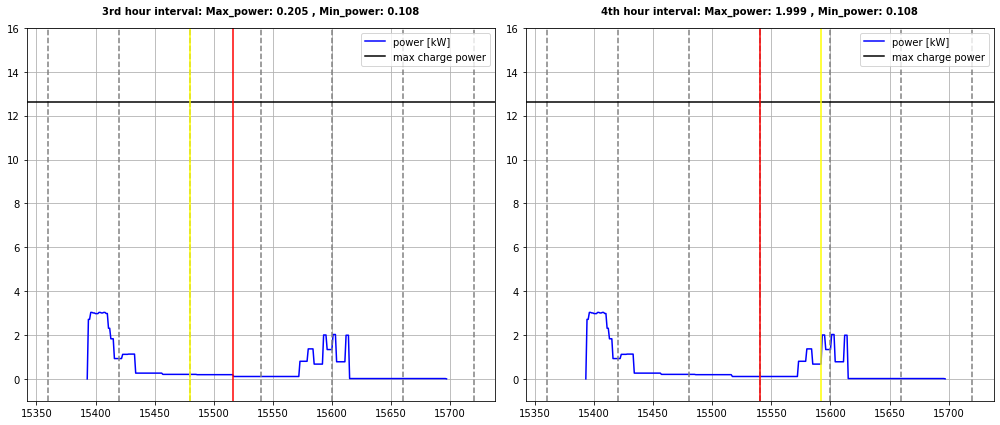

In [15]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15480:15540]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15480:15540]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("3rd hour interval: Max_power: 0.205 , Min_power: 0.108", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15540:15600]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15540:15600]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("4th hour interval: Max_power: 1.999 , Min_power: 0.108", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

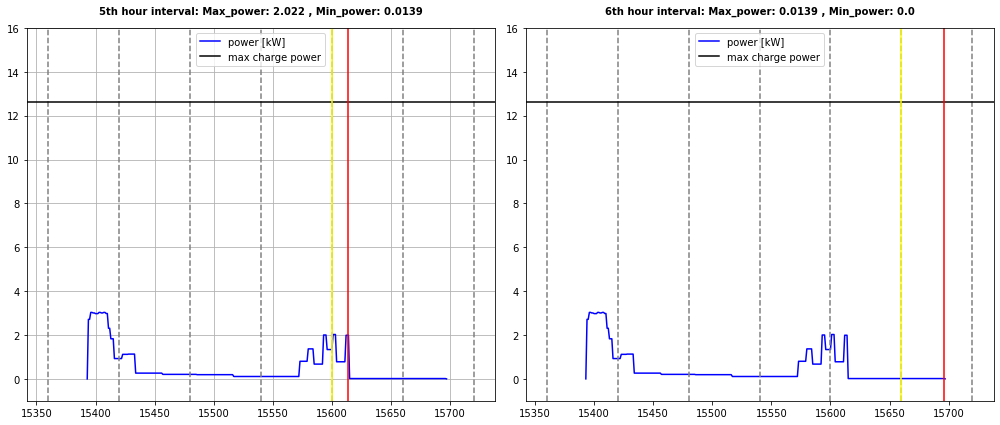

In [16]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15600:15660]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15600:15660]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("5th hour interval: Max_power: 2.022 , Min_power: 0.0139", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15660:15720]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15660:15720]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("6th hour interval: Max_power: 0.0139 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

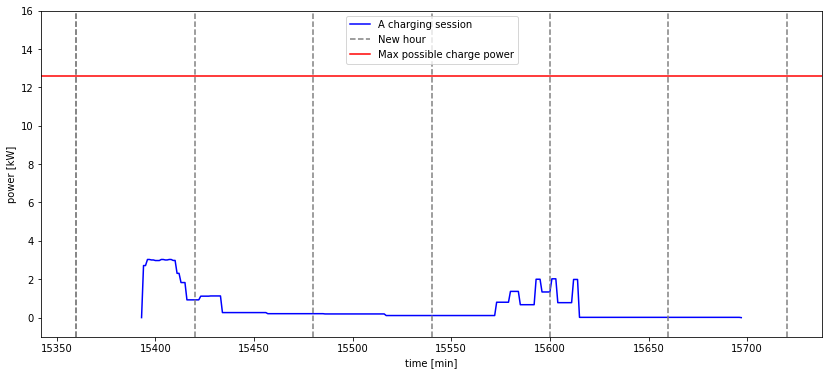

In [17]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(x, y1, label='A charging session', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')
    
plt.axvline(x=15360, color='grey', linestyle='--', label='New hour')
    
plt.axhline(y=max(EV1["power(kW)"].values), label='Max possible charge power', color='red', linestyle='-')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend()
plt.ylim(-1, 16)

# title
# plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

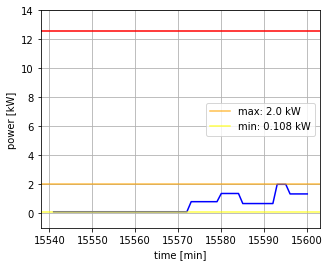

In [18]:
x  = EV1[15540:15600]["minute of year"].values
y1 = EV1[15540:15600]["power(kW)"].values

plt.figure(figsize=(5, 4))

plt.plot(x, y1, color='blue')

plt.axhline(y=max(EV1["power(kW)"].values), color='red', linestyle='-')

# Displaying the legend
plt.ylim(-1, 14)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# max values in a given hour
plt.axhline(y=max(EV1[15540:15600]['power(kW)'].values), color='orange', linestyle='-', alpha = 0.7, label="max: 2.0 kW")

# min values in a given hour
plt.axhline(y=min(EV1[15540:15600]['power(kW)'].values), color='yellow', linestyle='-', alpha = 0.7, label="min: 0.108 kW")

# grid
plt.grid(True)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()

_____________________________________________________________________________________________________________________________

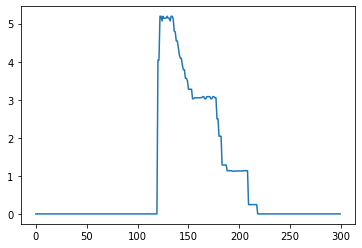

In [19]:
plt.plot(EV1[488800:489100]["power(kW)"].values);

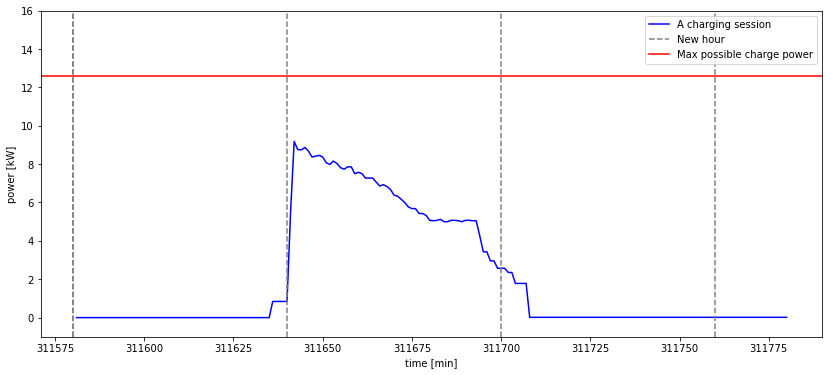

In [20]:
x  = EV1[311580:311780]["minute of year"].values
y1 = EV1[311580:311780]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(x, y1, label='A charging session', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(311580, 311780, 60):
    plt.axvline(x=i, color='grey', linestyle='--')
    
plt.axvline(x=311580, color='grey', linestyle='--', label='New hour')
    
plt.axhline(y=max(EV1["power(kW)"].values), label='Max possible charge power', color='red', linestyle='-')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend()
plt.ylim(-1, 16)

# title
# plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

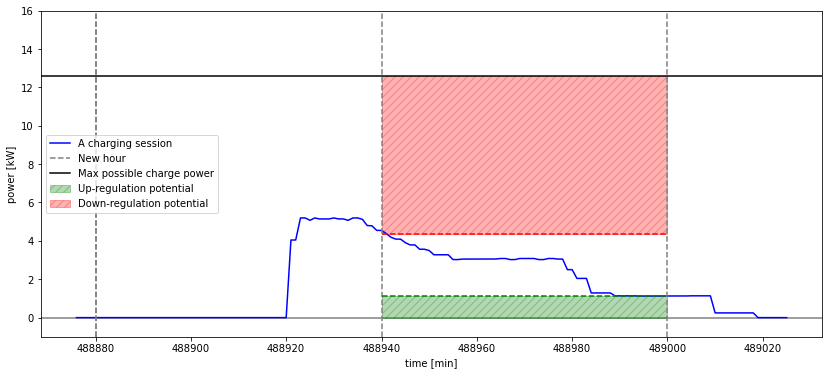

In [21]:
x  = EV1[488875:489025]["minute of year"].values
y1 = EV1[488875:489025]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(x, y1, label='A charging session', color='blue')

# plotting horizontal x-axis
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, zorder=0)

# Plotting vertical hour lines at intervals of 60 min.
for i in range(488880, 489025, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

# plotting the first hour lines vertically in order to get a label
plt.axvline(x=488880, color='grey', linestyle='--', label='New hour')

# plotting horizontal max power line
plt.axhline(y=max(EV1["power(kW)"].values), label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=min(EV1[488940:489000]["power(kW)"].values), xmin=0.437, xmax=0.8, color='green', linestyle='--')
plt.axhline(y=max(EV1[488940:489000]["power(kW)"].values), xmin=0.437, xmax=0.8, color='red', linestyle='--')

# fill in area between the lines
plt.fill_between(x, min(EV1[488940:489000]["power(kW)"].values), 0, where=(x > 488939) & (x < 489001), color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(x, max(EV1["power(kW)"].values), max(EV1[488940:489000]["power(kW)"].values), where=(x > 488939) & (x < 489001), color='red', alpha=0.3, label='Down-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend(loc='center left')
plt.ylim(-1, 16)

# title
# plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

# Plot 1.2

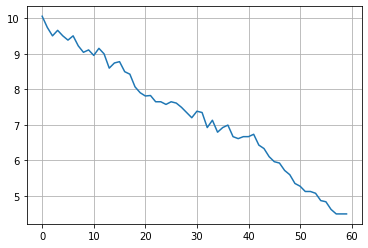

In [35]:
plt.plot(EV1[492400:492460]['power(kW)'].values)
plt.grid(True)
plt.show()

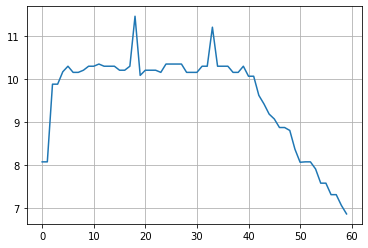

In [72]:
plt.plot(EV1[277406:277466]['power(kW)'].values)
plt.grid(True)
plt.show()

In [182]:
import os
import glob
from fnmatch import fnmatch

csv_filer = [os.path.join(base_path, fil) for fil in os.listdir(base_path) if fnmatch(fil, '*.csv')]

for csv_fil in csv_filer:
    print(csv_fil)
    
dataframes1_2 = [pd.read_csv(csv_fil, nrows=30000) for csv_fil in csv_filer] #delete "nrows=30000" if the entire csv files needs to be read

C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_1544.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2067.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2113.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2187.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2188.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2220.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2222.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2225.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2226.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2229.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2243.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2244.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2249.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2

C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4704.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4705.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4706.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4707.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4709.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4710.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4711.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4712.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4715.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4716.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4717.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4719.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4720.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4

In [92]:
dataframes1_2

[       energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
 0                      0.0        0.0        0.0                 0.0  \
 1                      0.0        0.0        0.0                 0.0   
 2                      0.0        0.0        0.0                 0.0   
 3                      0.0        0.0        0.0                 0.0   
 4                      0.0        0.0        0.0                 0.0   
 ...                    ...        ...        ...                 ...   
 29995                  0.0        0.0        0.0                 0.0   
 29996                  0.0        0.0        0.0                 0.0   
 29997                  0.0        0.0        0.0                 0.0   
 29998                  0.0        0.0        0.0                 0.0   
 29999                  0.0        0.0        0.0                 0.0   
 
        max_effect of charger (kW)  minute of year  
 0                            14.4             1.0  
 1              

In [93]:
len(dataframes1_2)

1509

In [96]:
sum_df = sum(dataframes1_2)

summeret plot:

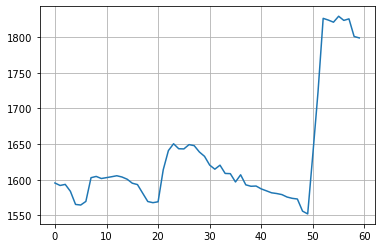

In [97]:
plt.plot(sum_df[11410:11470]['power(kW)'].values)
plt.grid(True)
plt.show()

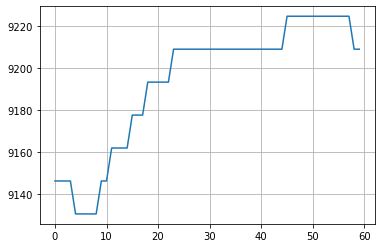

In [98]:
plt.plot((sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values)
plt.grid(True)
plt.show()

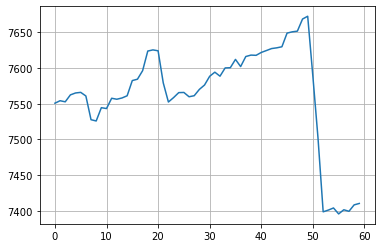

In [99]:
plt.plot((sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values-sum_df[11410:11470]['power(kW)'].values)
plt.grid(True)
plt.show()

In [203]:
# minimum difference 
down_reg = min((sum_df[11410:11470]['max_effect of charger (kW)']/1509)*sum_df[11410:11470]['connected (1 or 0)']-sum_df[11410:11470]['power(kW)'])
print(down_reg)
up_reg = min(sum_df[11410:11470]['power(kW)'].values)
print(up_reg)

7395.570957490685
1552.067172573902


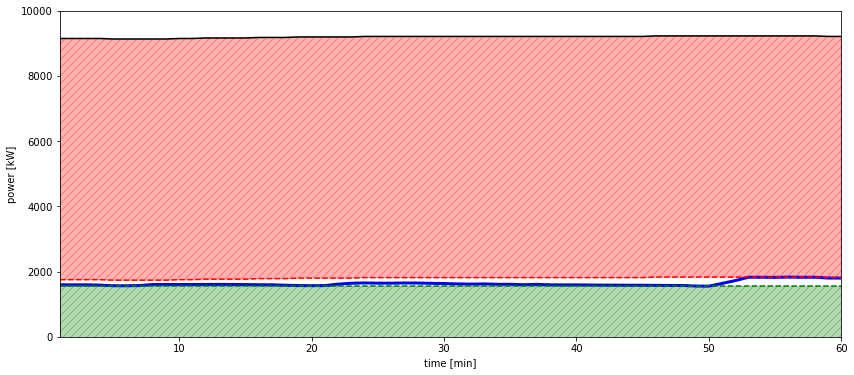

In [294]:
y1 = sum_df[11410:11470]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(np.linspace(1, 60, 60), y1, label='A charging session', color='blue', linewidth=3)

# plotting horizontal max power line
plt.plot(np.linspace(1, 60, 60), (sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values, label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=up_reg, color='green', linestyle='--')
plt.plot(np.linspace(1, 60, 60), (sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values - down_reg, color='red', linestyle='--')

# fill in area between the lines
plt.fill_between(np.linspace(1, 60, 60), up_reg, 0,  where=None, color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(np.linspace(1, 60, 60), (sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values, (sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values-down_reg, where=None, color='red', alpha=0.3, label='Down-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
#plt.legend(loc='center left')
plt.ylim(-1, 10000)
plt.xlim(1, 60)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

Plotting some of the chargers that are connected at the time period above:

In [177]:
# find CB with big max power vs min power differences
for k in range(1,1000):
    if max(dataframes1_2[k]["power(kW)"][11410:11470])-min(dataframes1_2[k]["power(kW)"][11410:11470]) > 3 and min(dataframes1_2[k]["power(kW)"][11410:11470]) > 0.1:
        print(k)

15
103
455
578
617


In [180]:
dataframes1_2[103]["power(kW)"][11410:11470].values

array([0.10080399, 0.10080399, 0.10080399, 0.10080399, 0.10080399,
       0.10080399, 0.10080399, 0.10080399, 0.10080399, 0.10080399,
       0.10080399, 0.10080399, 0.10080399, 0.10080399, 0.10080399,
       0.10080399, 0.10080399, 0.10080399, 0.10080399, 0.10080399,
       0.10080399, 7.12941175, 7.34399999, 7.12941175, 7.30799999,
       7.12941175, 7.34399999, 7.12941175, 7.34399999, 7.30799999,
       7.30799999, 7.19999999, 7.27199999, 7.19999999, 7.34399999,
       7.23564355, 7.19999999, 7.34399999, 7.34399999, 7.19999999,
       7.27128711, 7.27199999, 7.34399999, 7.19999999, 7.34399999,
       7.27128711, 7.34399999, 7.19999999, 7.34399999, 7.19999999,
       7.27128711, 7.27128711, 7.34399999, 7.19999999, 7.34399999,
       7.19999999, 7.27128711, 7.19999999, 7.34399999, 7.19999999])

we pick the following three CBs:
15
455
617
maybe CB 103

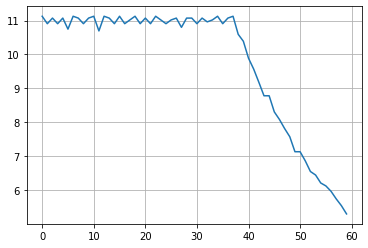

In [181]:
plt.plot(dataframes1_2[15]["power(kW)"][11410:11470].values*dataframes1_2[15]["connected (1 or 0)"][11410:11470].values)
plt.grid(True)
plt.show()

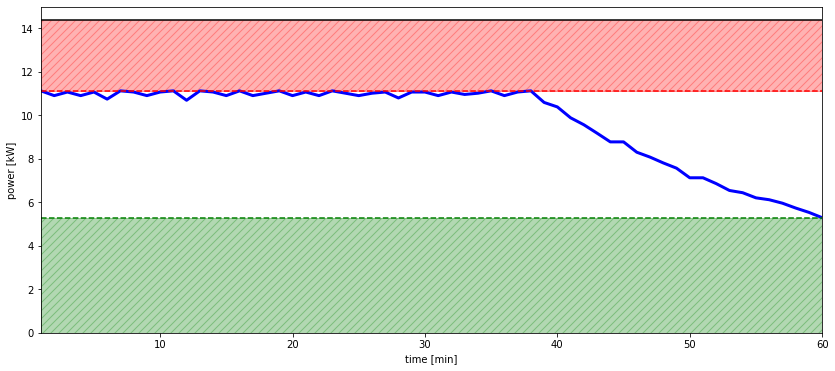

In [295]:
y1 = dataframes1_2[15][11410:11470]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(np.linspace(1, 60, 60), y1, label='A charging session', color='blue', linewidth=3)

# plotting horizontal max power line
plt.plot(np.linspace(1, 60, 60), dataframes1_2[15][11410:11470]['max_effect of charger (kW)'].values, label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=max(dataframes1_2[15][11410:11470]["power(kW)"]), color='red', linestyle='--')
plt.axhline(y=min(dataframes1_2[15][11410:11470]["power(kW)"]), color='green', linestyle='--')

# fill in area between the lines
plt.fill_between(np.linspace(1, 60, 60), min(dataframes1_2[15][11410:11470]["power(kW)"]), 0,  where=None, color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(np.linspace(1, 60, 60), max(dataframes1_2[15][11410:11470]["power(kW)"]), max(dataframes1_2[15][11410:11470]['max_effect of charger (kW)']),  where=None, color='red', alpha=0.3, label='Up-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
#plt.legend(loc='center left')
plt.ylim(0, 15)
plt.xlim(1, 60)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

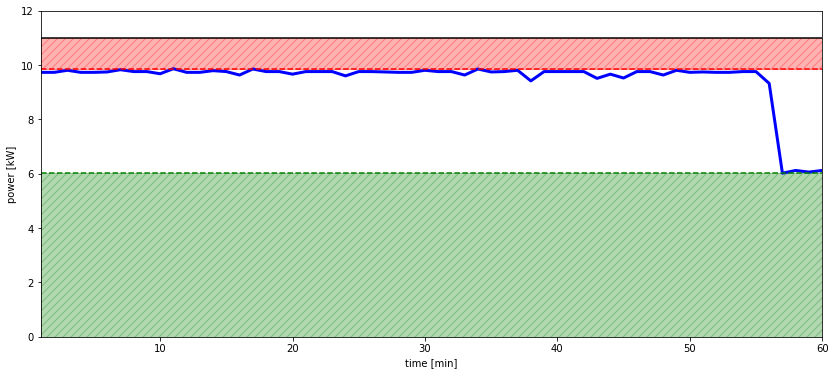

In [296]:
y1 = dataframes1_2[455][11410:11470]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(np.linspace(1, 60, 60), y1, label='A charging session', color='blue', linewidth=3)

# plotting horizontal max power line
plt.plot(np.linspace(1, 60, 60), dataframes1_2[455][11410:11470]['max_effect of charger (kW)'].values, label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=max(dataframes1_2[455][11410:11470]["power(kW)"]), color='red', linestyle='--')
plt.axhline(y=min(dataframes1_2[455][11410:11470]["power(kW)"]), color='green', linestyle='--')

# fill in area between the lines
plt.fill_between(np.linspace(1, 60, 60), min(dataframes1_2[455][11410:11470]["power(kW)"]), 0,  where=None, color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(np.linspace(1, 60, 60), max(dataframes1_2[455][11410:11470]["power(kW)"]), max(dataframes1_2[455][11410:11470]['max_effect of charger (kW)']),  where=None, color='red', alpha=0.3, label='Up-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
#plt.legend(loc='center left')
plt.ylim(0, 12)
plt.xlim(1, 60)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

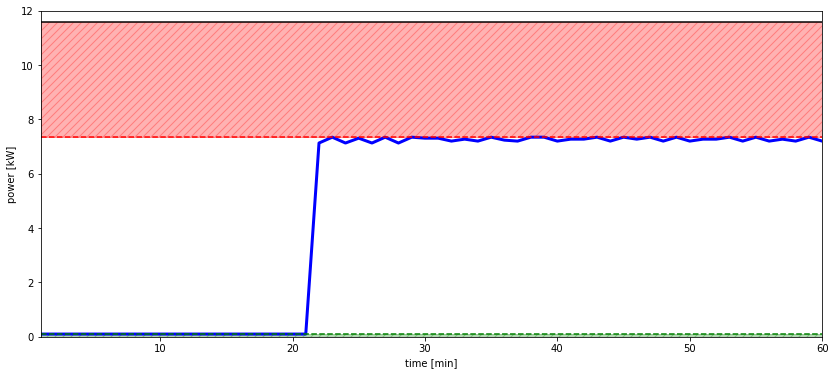

In [297]:
y1 = dataframes1_2[103][11410:11470]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(np.linspace(1, 60, 60), y1, label='A charging session', color='blue', linewidth=3)

# plotting horizontal max power line
plt.plot(np.linspace(1, 60, 60), dataframes1_2[103][11410:11470]['max_effect of charger (kW)'].values, label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=max(dataframes1_2[103][11410:11470]["power(kW)"]), color='red', linestyle='--')
plt.axhline(y=min(dataframes1_2[103][11410:11470]["power(kW)"]), color='green', linestyle='--')

# fill in area between the lines
plt.fill_between(np.linspace(1, 60, 60), min(dataframes1_2[103][11410:11470]["power(kW)"]), 0,  where=None, color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(np.linspace(1, 60, 60), max(dataframes1_2[103][11410:11470]["power(kW)"]), max(dataframes1_2[103][11410:11470]['max_effect of charger (kW)']),  where=None, color='red', alpha=0.3, label='Up-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
#plt.legend(loc='center left')
plt.ylim(0, 12)
plt.xlim(1, 60)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

# plot 2

In [22]:
min(EV1[15540:15600]['power(kW)'].values)

0.10823812365604

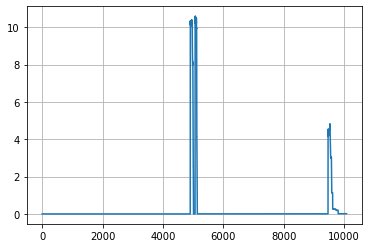

In [23]:
plt.plot(EV1[1440*0:1440*7]['power(kW)'].values)
plt.grid(True)
plt.show()

In [24]:
hey = copy.deepcopy(EV1[1440*7*0:1440*7*1]['power(kW)'].values)
hey2 = copy.deepcopy(EV1[1440*7*0:1440*7*1]['power(kW)'].values)

for i in range (2, 11):
    hey += EV1[1440*7*(i-1):1440*7*i]['power(kW)'].values
    
for i in range (2, 51):
    hey2 += EV1[1440*7*(i-1):1440*7*i]['power(kW)'].values

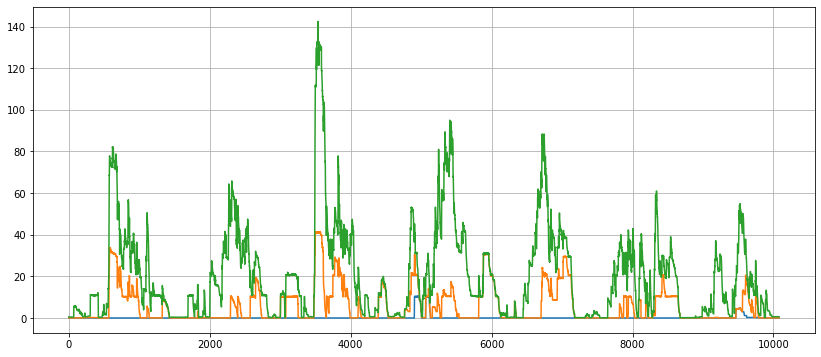

In [25]:
plt.figure(figsize=(14, 6))

plt.plot(EV1[1440*0:1440*7]['power(kW)'].values, label="1 charger")
plt.plot(hey, label="10 chargers")
plt.plot(hey2, label="50 chargers")
plt.grid(True)
plt.show()

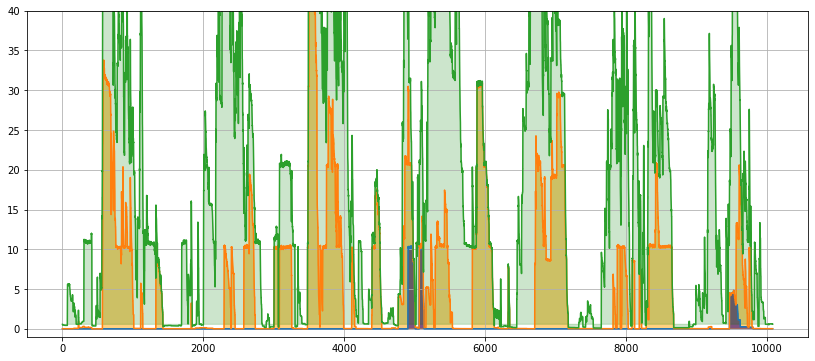

In [26]:
plt.figure(figsize=(14, 6))

plt.plot(EV1[1440*0:1440*7]['power(kW)'].values, label="1 charger")
plt.fill(EV1[1440*0:1440*7]['power(kW)'].values, color='blue', alpha=1)
plt.plot(hey, label="10 chargers")
plt.fill(hey, color='orange', alpha=0.5)
plt.plot(hey2, label="50 chargers")
plt.fill(hey2, color='green', alpha=0.2)
plt.grid(True)
plt.ylim(-1, 40)
plt.show()

# load data to the following plots

### There will be made 3 datafremes that respectively contains 1500, 150 and 15 chargers

In [45]:
import os
import glob
from fnmatch import fnmatch

csv_filer = [os.path.join(base_path, fil) for fil in os.listdir(base_path) if fnmatch(fil, '*.csv')]

for csv_fil in csv_filer:
    print(csv_fil)
    
dataframes = [pd.read_csv(csv_fil) for csv_fil in csv_filer] 


C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\1544.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2067.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2113.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2187.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2188.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2220.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2222.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2225.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2226.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2229.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2243.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2244.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\2249.csv
C:\Users\ASUS\Documents\11. sem - kand

C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4627.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4628.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4630.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4632.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4635.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4636.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4638.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4639.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4641.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4643.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4644.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4645.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned_data_RM90\4646.csv
C:\Users\ASUS\Documents\11. sem - kand

In [46]:
dataframes

[        energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
 0                       0.0        0.0        0.0                 0.0  \
 1                       0.0        0.0        0.0                 0.0   
 2                       0.0        0.0        0.0                 0.0   
 3                       0.0        0.0        0.0                 0.0   
 4                       0.0        0.0        0.0                 0.0   
 ...                     ...        ...        ...                 ...   
 525595                  0.0        0.0        0.0                 0.0   
 525596                  0.0        0.0        0.0                 0.0   
 525597                  0.0        0.0        0.0                 0.0   
 525598                  0.0        0.0        0.0                 0.0   
 525599                  0.0        0.0        0.0                 0.0   
 
         max_effect of charger (kW)  minute of year  Downwards_flex   
 0                             14.4    

In [47]:
print(dataframes[1].iloc[1])

energy_resovior (%)            0.00
SoC (kWh)                      0.00
power(kW)                      0.00
connected (1 or 0)             0.00
max_effect of charger (kW)    12.24
minute of year                 2.00
Downwards_flex                 0.00
upwards_flex                   0.00
Name: 1, dtype: float64


In [ ]:
print(dataframes[1].iloc[:, 2])

In [ ]:
plt.plot(dataframes[3].iloc[:, 2].values)
plt.xlim(1440*7*0,1440*7*1)
plt.grid(True)
plt.show()

In [ ]:
dataframes[0:3]

In [51]:
dataframes[1426]

energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
0                       0.0        0.0        0.0                 0.0  \
1                       0.0        0.0        0.0                 0.0   
2                       0.0        0.0        0.0                 0.0   
3                       0.0        0.0        0.0                 0.0   
4                       0.0        0.0        0.0                 0.0   
...                     ...        ...        ...                 ...   
525595                  0.0        0.0        0.0                 0.0   
525596                  0.0        0.0        0.0                 0.0   
525597                  0.0        0.0        0.0                 0.0   
525598                  0.0        0.0        0.0                 0.0   
525599                  0.0        0.0        0.0                 0.0   

        max_effect of charger (kW)  minute of year  Downwards_flex   
0                            3.517             1.0             0.0  \
1                            3.517             2.0             0.0   
2                            3.517             3.0             0.0   
3                            3.517             4.0             0.0   
4                            3.517             5.0             0.0   
...                            ...             ...             ...   
525595                       3.517        525596.0             0.0   
525596                       3.517        525597.0             0.0   
525597                       3.517        525598.0             0.0   
525598                       3.517        525599.0             0.0   
525599                       3.517        525600.0             0.0   

        upwards_flex  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
525595           0.0  
525596           0.0  
525597           0.0  
525598           0.0  
525599           0.0  

[525600 rows x 8 columns]

#### collecting first 1500 dataframes in one 

In [52]:
len(dataframes)

1427

In [ ]:
print(len(dataframes))
print(len(dataframes[0:(1427-1)]))

In [53]:
# Initialize a dataframe to hold the sums
sum_df_1427 = pd.DataFrame()

# Sum the columns across all dataframes
for df in dataframes[0:(1427-1)]:
    sum_df_1427 = sum_df_1427.add(df, fill_value=0)

# Display the resulting dataframe
print(sum_df_1427)

        energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
0                       0.0        0.0        0.0                 0.0  \
1                       0.0        0.0        0.0                 0.0   
2                       0.0        0.0        0.0                 0.0   
3                       0.0        0.0        0.0                 0.0   
4                       0.0        0.0        0.0                 0.0   
...                     ...        ...        ...                 ...   
525595                  0.0        0.0        0.0                 0.0   
525596                  0.0        0.0        0.0                 0.0   
525597                  0.0        0.0        0.0                 0.0   
525598                  0.0        0.0        0.0                 0.0   
525599                  0.0        0.0        0.0                 0.0   

        max_effect of charger (kW)  minute of year  Downwards_flex   
0                        14223.981          1426.0   

#### collecting first 150 dataframes in one 

In [ ]:
len(dataframes[0:150])

In [ ]:
# Initialize a dataframe to hold the sums
sum_df_150 = pd.DataFrame()

# Sum the columns across all dataframes
for df in dataframes[0:150]:
    sum_df_150 = sum_df_150.add(df, fill_value=0)

#### collecting first 15 dataframes in one 

In [ ]:
len(dataframes[0:15])

In [ ]:
# Initialize a dataframe to hold the sums
sum_df_15 = pd.DataFrame()

# Sum the columns across all dataframes
for df in dataframes[0:15]:
    sum_df_15 = sum_df_15.add(df, fill_value=0)

# plot 3 - show power output aggregated vs single charger

In [54]:
sum_df_1500 = sum_df_1427

NameError: name 'EV1' is not defined

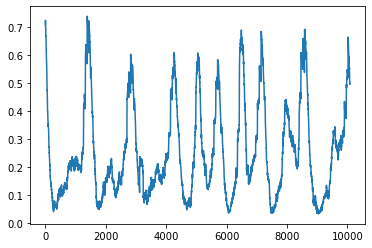

In [55]:
plt.plot(sum_df_1500[1440*7*3:1440*7*4]['power(kW)'].values/len(dataframes[0:1500]), label='Aggregated power average [kW]')
plt.plot(EV1[1440*7*3:1440*7*4]['power(kW)'].values, label='Power from one charger')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*7, 1440):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.ylim(0,1)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers vs 1 charger")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(sum_df_1500[1440*7*3:1440*7*4]['connected (1 or 0)'].values)

for i in range(0, 1440*7, 1440):
    plt.axvline(x=i, color='grey', linestyle='--')
plt.ylim(0,400)
plt.xlabel('time [min]')
plt.ylabel('Amount of connections')
plt.title("How many chargers are connected out of 1500 chargers")
plt.grid(True)
plt.show()

In [ ]:
plt.plot(sum_df_1500[1440*7*0:1440*2]['power(kW)'].values)
plt.grid(True)
plt.show()

# Plot 4 - seasonal differences in charging

### obs. first data point is the 23-03-2022 00:00:00

In [176]:
sum_df_1500 = sum_df_1427

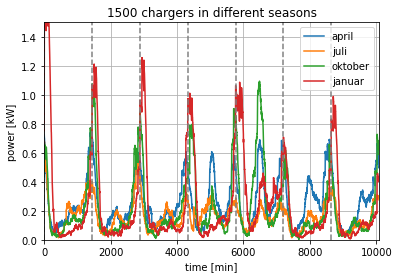

In [56]:
plt.plot(sum_df_1500[1440*7*3:1440*7*4]['power(kW)'].values/len(dataframes[0:1500]), label='april')
plt.plot(sum_df_1500[1440*7*16:1440*7*17]['power(kW)'].values/len(dataframes[0:1500]), label='juli')
plt.plot(sum_df_1500[1440*7*29:1440*7*30]['power(kW)'].values/len(dataframes[0:1500]), label='oktober')
plt.plot(sum_df_1500[1440*7*42:1440*7*43]['power(kW)'].values/len(dataframes[0:1500]), label='januar')
#plt.plot(EV1[1440*7*0:1440*7*52]['power(kW)'].values, label='Power from one charger')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*7*1, 1440):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.ylim(0,1.5)
plt.xlim(1440*7*0,1440*7*1)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different seasons")
plt.legend()
plt.grid(True)
plt.show()

# Plot 5 - weekday tendencies in charging

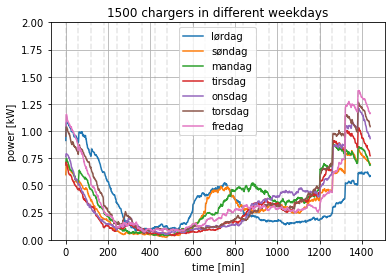

In [57]:
plt.plot(sum_df_1500[1440*1*3:1440*1*4]['power(kW)'].values/len(dataframes[0:1500]), label='lørdag')
plt.plot(sum_df_1500[1440*1*4:1440*1*5]['power(kW)'].values/len(dataframes[0:1500]), label='søndag')
plt.plot(sum_df_1500[1440*1*5:1440*1*6]['power(kW)'].values/len(dataframes[0:1500]), label='mandag')
plt.plot(sum_df_1500[1440*1*6:1440*1*7]['power(kW)'].values/len(dataframes[0:1500]), label='tirsdag')
plt.plot(sum_df_1500[1440*1*7:1440*1*8]['power(kW)'].values/len(dataframes[0:1500]), label='onsdag')
plt.plot(sum_df_1500[1440*1*8:1440*1*9]['power(kW)'].values/len(dataframes[0:1500]), label='torsdag')
plt.plot(sum_df_1500[1440*1*9:1440*1*10]['power(kW)'].values/len(dataframes[0:1500]), label='fredag')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

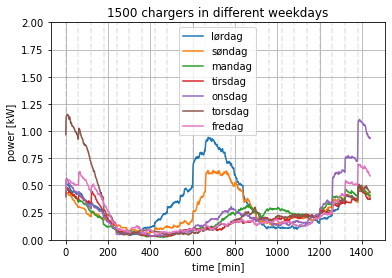

In [58]:
plt.plot(sum_df_1500[1440*1*101:1440*1*102]['power(kW)'].values/len(dataframes[0:1500]), label='lørdag')
plt.plot(sum_df_1500[1440*1*102:1440*1*103]['power(kW)'].values/len(dataframes[0:1500]), label='søndag')
plt.plot(sum_df_1500[1440*1*103:1440*1*104]['power(kW)'].values/len(dataframes[0:1500]), label='mandag')
plt.plot(sum_df_1500[1440*1*104:1440*1*105]['power(kW)'].values/len(dataframes[0:1500]), label='tirsdag')
plt.plot(sum_df_1500[1440*1*105:1440*1*106]['power(kW)'].values/len(dataframes[0:1500]), label='onsdag')
plt.plot(sum_df_1500[1440*1*106:1440*1*107]['power(kW)'].values/len(dataframes[0:1500]), label='torsdag')
plt.plot(sum_df_1500[1440*1*107:1440*1*108]['power(kW)'].values/len(dataframes[0:1500]), label='fredag')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

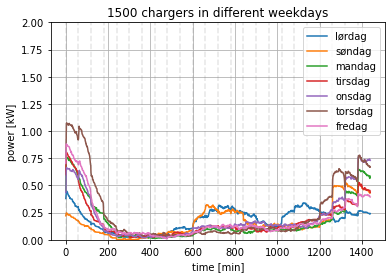

In [59]:
plt.plot(sum_df_1500[1440*1*199:1440*1*200]['power(kW)'].values/len(dataframes[0:1500]), label='lørdag')
plt.plot(sum_df_1500[1440*1*200:1440*1*201]['power(kW)'].values/len(dataframes[0:1500]), label='søndag')
plt.plot(sum_df_1500[1440*1*201:1440*1*202]['power(kW)'].values/len(dataframes[0:1500]), label='mandag')
plt.plot(sum_df_1500[1440*1*202:1440*1*203]['power(kW)'].values/len(dataframes[0:1500]), label='tirsdag')
plt.plot(sum_df_1500[1440*1*203:1440*1*204]['power(kW)'].values/len(dataframes[0:1500]), label='onsdag')
plt.plot(sum_df_1500[1440*1*204:1440*1*205]['power(kW)'].values/len(dataframes[0:1500]), label='torsdag')
plt.plot(sum_df_1500[1440*1*205:1440*1*206]['power(kW)'].values/len(dataframes[0:1500]), label='fredag')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

In [179]:
sum_df_1500

energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
0                       0.0        0.0        0.0                 0.0  \
1                       0.0        0.0        0.0                 0.0   
2                       0.0        0.0        0.0                 0.0   
3                       0.0        0.0        0.0                 0.0   
4                       0.0        0.0        0.0                 0.0   
...                     ...        ...        ...                 ...   
525595                  0.0        0.0        0.0                 0.0   
525596                  0.0        0.0        0.0                 0.0   
525597                  0.0        0.0        0.0                 0.0   
525598                  0.0        0.0        0.0                 0.0   
525599                  0.0        0.0        0.0                 0.0   

        max_effect of charger (kW)  minute of year  Downwards_flex   
0                        14223.981          1426.0             0.0  \
1                        14223.981          2852.0             0.0   
2                        14223.981          4278.0             0.0   
3                        14223.981          5704.0             0.0   
4                        14223.981          7130.0             0.0   
...                            ...             ...             ...   
525595                   14216.481     748974300.0             0.0   
525596                   14216.481     748975725.0             0.0   
525597                   14216.481     748977150.0             0.0   
525598                   14216.481     748978575.0             0.0   
525599                   14216.481     748980000.0             0.0   

        upwards_flex week day  week min  
0                0.0  Tuesday         1  
1                0.0  Tuesday         2  
2                0.0  Tuesday         3  
3                0.0  Tuesday         4  
4                0.0  Tuesday         5  
...              ...      ...       ...  
525595           0.0  Tuesday      1436  
525596           0.0  Tuesday      1437  
525597           0.0  Tuesday      1438  
525598           0.0  Tuesday      1439  
525599           0.0  Tuesday      1440  

[525600 rows x 10 columns]

In [344]:
sum_df_1500["week season"] = ""
sum_df_1500["week season 4"] = ""
sum_df_1500["week month"] = ""
sum_df_1500["week day"] = ""
sum_df_1500["week min"] = 0

In [345]:
sum_df_1500

energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
0                       0.0        0.0        0.0                 0.0  \
1                       0.0        0.0        0.0                 0.0   
2                       0.0        0.0        0.0                 0.0   
3                       0.0        0.0        0.0                 0.0   
4                       0.0        0.0        0.0                 0.0   
...                     ...        ...        ...                 ...   
525595                  0.0        0.0        0.0                 0.0   
525596                  0.0        0.0        0.0                 0.0   
525597                  0.0        0.0        0.0                 0.0   
525598                  0.0        0.0        0.0                 0.0   
525599                  0.0        0.0        0.0                 0.0   

        max_effect of charger (kW)  minute of year  Downwards_flex   
0                        14223.981          1426.0             0.0  \
1                        14223.981          2852.0             0.0   
2                        14223.981          4278.0             0.0   
3                        14223.981          5704.0             0.0   
4                        14223.981          7130.0             0.0   
...                            ...             ...             ...   
525595                   14216.481     748974300.0             0.0   
525596                   14216.481     748975725.0             0.0   
525597                   14216.481     748977150.0             0.0   
525598                   14216.481     748978575.0             0.0   
525599                   14216.481     748980000.0             0.0   

        upwards_flex week day  week min week month week season week season 4  
0                0.0                  0                                       
1                0.0                  0                                       
2                0.0                  0                                       
3                0.0                  0                                       
4                0.0                  0                                       
...              ...      ...       ...        ...         ...           ...  
525595           0.0                  0                                       
525596           0.0                  0                                       
525597           0.0                  0                                       
525598           0.0                  0                                       
525599           0.0                  0                                       

[525600 rows x 13 columns]

In [349]:
min_list = range(1,1441)
time = 0
month = 0

for i in range(52):
    for j in range(7):
        
        if month <= (8+30+31) or month >= 343:
            sum_df_1500["week season 4"][(time*1440):((time+1)*1440)] = 'Spring'
        elif month <= (8+30+31+30+31+31):
            sum_df_1500["week season 4"][(time*1440):((time+1)*1440)] = 'Summer'
        elif month <= (8+30+31+30+31+31+30+31+30):
            sum_df_1500["week season 4"][(time*1440):((time+1)*1440)] = 'Fall'
        elif month <= (8+30+31+30+31+31+30+31+30+31+31+28):
            sum_df_1500["week season 4"][(time*1440):((time+1)*1440)] = 'Winter'
        
        if month <= 8 or month >= (8+30+31+30+31+31+30):
            sum_df_1500["week season"][(time*1440):((time+1)*1440)] = 'Winter'
        else: 
            sum_df_1500["week season"][(time*1440):((time+1)*1440)] = 'Summer'
            
        if month <= 8 or month >= 343:
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'March'
        elif month <= (8+30):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'April'
        elif month <= (8+30+31):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'May'
        elif month <= (8+30+31+30):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'June'
        elif month <= (8+30+31+30+31):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'July'
        elif month <= (8+30+31+30+31+31):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'August'
        elif month <= (8+30+31+30+31+31+30):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'September'
        elif month <= (8+30+31+30+31+31+30+31):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'October'
        elif month <= (8+30+31+30+31+31+30+31+30):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'November'
        elif month <= (8+30+31+30+31+31+30+31+30+31):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'December'
        elif month <= (8+30+31+30+31+31+30+31+30+31+31):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'January'
        elif month <= (8+30+31+30+31+31+30+31+30+31+31+28):
            sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'February'
        
        if j == 0:
            sum_df_1500["week day"][(time*1440):((time+1)*1440)] = 'Wednesday'
            sum_df_1500["week min"][(time*1440):((time+1)*1440)] = list(min_list)
        elif j == 1:
            sum_df_1500["week day"][(time*1440):((time+1)*1440)] = 'Thursday'
            sum_df_1500["week min"][(time*1440):((time+1)*1440)] = list(min_list)
        elif j == 2:
            sum_df_1500["week day"][(time*1440):((time+1)*1440)] = 'Friday'
            sum_df_1500["week min"][(time*1440):((time+1)*1440)] = list(min_list)
        elif j == 3:
            sum_df_1500["week day"][(time*1440):((time+1)*1440)] = 'Saturday'
            sum_df_1500["week min"][(time*1440):((time+1)*1440)] = list(min_list)
        elif j == 4:
            sum_df_1500["week day"][(time*1440):((time+1)*1440)] = 'Sunday'
            sum_df_1500["week min"][(time*1440):((time+1)*1440)] = list(min_list)
        elif j == 5:
            sum_df_1500["week day"][(time*1440):((time+1)*1440)] = 'Monday'
            sum_df_1500["week min"][(time*1440):((time+1)*1440)] = list(min_list)
        else:
            sum_df_1500["week day"][(time*1440):((time+1)*1440)] = 'Tuesday'
            sum_df_1500["week min"][(time*1440):((time+1)*1440)] = list(min_list)
        
        time += 1
        month += 1

sum_df_1500["week season 4"][(364*1440):(365*1440)] = 'Spring'
sum_df_1500["week season"][(364*1440):(365*1440)] = 'Winter'
sum_df_1500["week month"][(364*1440):(365*1440)] = 'March'
sum_df_1500["week day"][(364*1440):(365*1440)] = 'Wednesday'
sum_df_1500["week min"][(364*1440):(365*1440)] = list(min_list)

<ipython-input-349-4f7f9700c148>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week season 4"][(time*1440):((time+1)*1440)] = 'Spring'
<ipython-input-349-4f7f9700c148>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week season"][(time*1440):((time+1)*1440)] = 'Winter'
<ipython-input-349-4f7f9700c148>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week month"][(time*1440):((time+1)*1440)] 

<ipython-input-349-4f7f9700c148>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week season"][(time*1440):((time+1)*1440)] = 'Summer'
<ipython-input-349-4f7f9700c148>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'July'
<ipython-input-349-4f7f9700c148>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week day"][(time*1440):((time+1)*1440)] = 'Mon

<ipython-input-349-4f7f9700c148>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week season"][(time*1440):((time+1)*1440)] = 'Winter'
<ipython-input-349-4f7f9700c148>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week month"][(time*1440):((time+1)*1440)] = 'October'
<ipython-input-349-4f7f9700c148>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week day"][(time*1440):((time+1)*1440)] = '

<ipython-input-349-4f7f9700c148>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week season 4"][(time*1440):((time+1)*1440)] = 'Winter'
<ipython-input-349-4f7f9700c148>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week season"][(time*1440):((time+1)*1440)] = 'Winter'
<ipython-input-349-4f7f9700c148>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_df_1500["week month"][(time*1440):((time+1)*1440)]

In [351]:
sum_df_1500[11000:293000]

energy_resovior (%)    SoC (kWh)   power(kW)  connected (1 or 0)   
11000             89.721747  1168.926023  486.333760               219.0  \
11001             90.471098  1177.068683  488.559601               219.0   
11002             91.220482  1185.271215  492.151962               222.0   
11003             91.966370  1193.434417  489.792097               226.0   
11004             92.715621  1201.614616  490.811960               230.0   
...                     ...          ...         ...                 ...   
292995            53.684152   830.513893  187.477528                73.0   
292996            53.931919   833.588048  184.449280                73.0   
292997            54.179737   836.667408  184.761599                73.0   
292998            54.427427   839.750300  184.973544                73.0   
292999            54.678293   842.874928  187.477679                74.0   

        max_effect of charger (kW)  minute of year  Downwards_flex   
11000                    14223.981      15687426.0     1433.269924  \
11001                    14223.981      15688852.0     1431.034493   
11002                    14223.981      15690278.0     1448.288544   
11003                    14223.981      15691704.0     1476.014820   
11004                    14223.981      15693130.0     1501.599367   
...                            ...             ...             ...   
292995                   14223.981     417812296.0      498.799513   
292996                   14223.981     417813722.0      501.816564   
292997                   14223.981     417815148.0      501.493048   
292998                   14223.981     417816574.0      501.269906   
292999                   14223.981     417818000.0      502.484575   

        upwards_flex   week day  week min week month week season week season 4  
11000     486.333760  Wednesday       921      March      Winter        Spring  
11001     488.559601  Wednesday       922      March      Winter        Spring  
11002     492.151962  Wednesday       923      March      Winter        Spring  
11003     489.792097  Wednesday       924      March      Winter        Spring  
11004     490.811960  Wednesday       925      March      Winter        Spring  
...              ...        ...       ...        ...         ...           ...  
292995    187.477528  Wednesday       676    October      Winter          Fall  
292996    184.449280  Wednesday       677    October      Winter          Fall  
292997    184.761599  Wednesday       678    October      Winter          Fall  
292998    184.973544  Wednesday       679    October      Winter          Fall  
292999    187.477679  Wednesday       680    October      Winter          Fall  

[282000 rows x 13 columns]

In [326]:
ny_sum_df_1500 = sum_df_1500.groupby(['week day','week min'])[["connected (1 or 0)", "power(kW)"]].mean()

In [327]:
month_sum_df_1500 = sum_df_1500.groupby(['week month','week min'])[["connected (1 or 0)", "power(kW)"]].mean()

In [328]:
season_sum_df_1500 = sum_df_1500.groupby(['week season','week min'])[["connected (1 or 0)", "power(kW)"]].mean()

In [352]:
season_4_sum_df_1500 = sum_df_1500.groupby(['week season 4','week min'])[["connected (1 or 0)", "power(kW)"]].mean()

In [329]:
month_sum_df_1500[0:60000]

connected (1 or 0)    power(kW)
week month week min                                 
April      1                 445.500000  1057.114202
           2                 445.533333  1103.685668
           3                 445.533333  1138.385113
           4                 445.566667  1138.553503
           5                 445.566667  1135.376947
...                                 ...          ...
September  1436              337.666667   838.517623
           1437              337.633333   834.034292
           1438              337.666667   829.094714
           1439              337.366667   822.576918
           1440              336.733333   817.131492

[17280 rows x 2 columns]

In [330]:
ny_sum_df_1500

connected (1 or 0)    power(kW)
week day  week min                                 
Friday    1                 374.730769   936.082445
          2                 374.711538  1055.719716
          3                 374.750000  1152.697566
          4                 374.807692  1181.513940
          5                 374.769231  1189.063509
...                                ...          ...
Wednesday 1436              372.716981   947.962359
          1437              372.679245   944.400444
          1438              372.660377   940.404731
          1439              372.584906   935.689090
          1440              372.471698   929.338046

[10080 rows x 2 columns]

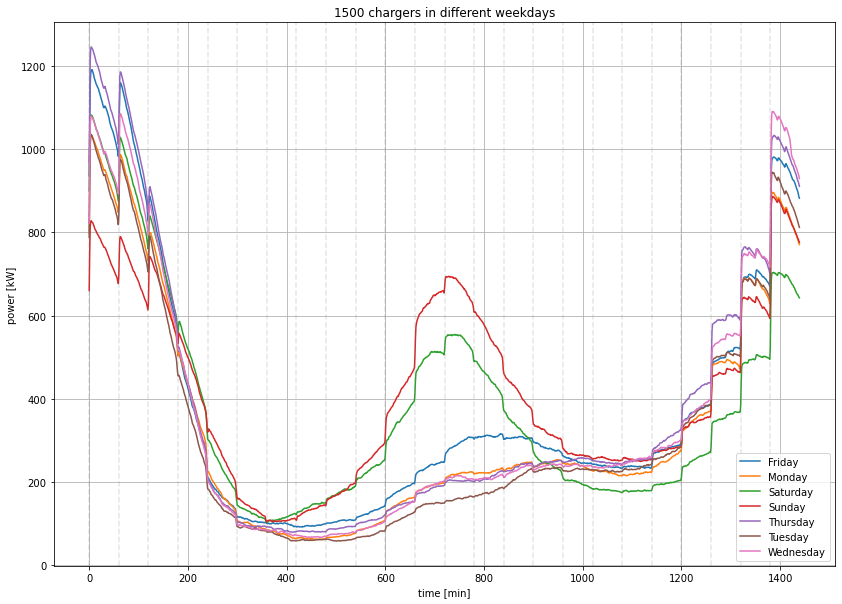

In [331]:
plt.figure(figsize=(14, 10))

plt.plot(ny_sum_df_1500[1440*0:1440*1]['power(kW)'].values, label='Friday')
plt.plot(ny_sum_df_1500[1440*1:1440*2]['power(kW)'].values, label='Monday')
plt.plot(ny_sum_df_1500[1440*2:1440*3]['power(kW)'].values, label='Saturday')
plt.plot(ny_sum_df_1500[1440*3:1440*4]['power(kW)'].values, label='Sunday')
plt.plot(ny_sum_df_1500[1440*4:1440*5]['power(kW)'].values, label='Thursday')
plt.plot(ny_sum_df_1500[1440*5:1440*6]['power(kW)'].values, label='Tuesday')
plt.plot(ny_sum_df_1500[1440*6:1440*7]['power(kW)'].values, label='Wednesday')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

#plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

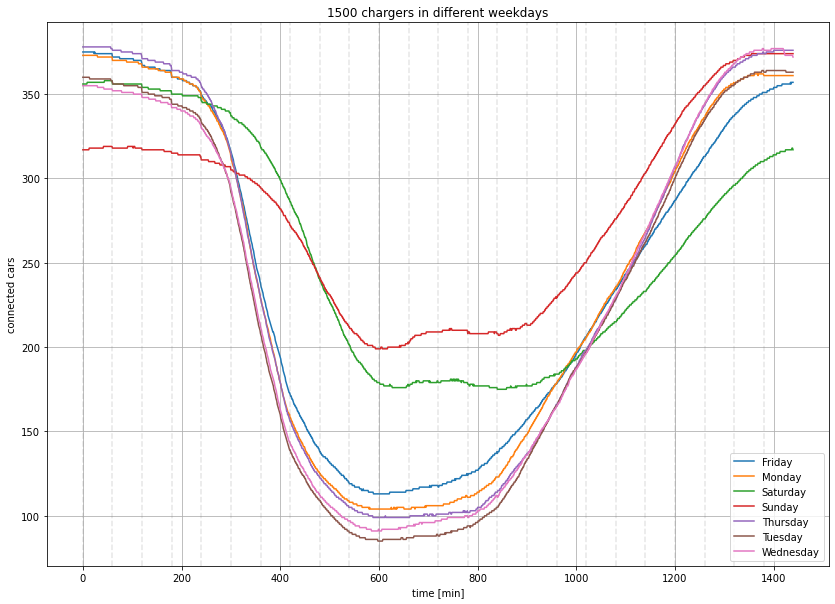

In [332]:
plt.figure(figsize=(14, 10))

plt.plot(ny_sum_df_1500[1440*0:1440*1]['connected (1 or 0)'].values.round(), label='Friday')
plt.plot(ny_sum_df_1500[1440*1:1440*2]['connected (1 or 0)'].values.round(), label='Monday')
plt.plot(ny_sum_df_1500[1440*2:1440*3]['connected (1 or 0)'].values.round(), label='Saturday')
plt.plot(ny_sum_df_1500[1440*3:1440*4]['connected (1 or 0)'].values.round(), label='Sunday')
plt.plot(ny_sum_df_1500[1440*4:1440*5]['connected (1 or 0)'].values.round(), label='Thursday')
plt.plot(ny_sum_df_1500[1440*5:1440*6]['connected (1 or 0)'].values.round(), label='Tuesday')
plt.plot(ny_sum_df_1500[1440*6:1440*7]['connected (1 or 0)'].values.round(), label='Wednesday')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

#plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('connected cars')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

In [333]:
month_sum_df_1500[1440*0:1440*12]

connected (1 or 0)    power(kW)
week month week min                                 
April      1                 445.500000  1057.114202
           2                 445.533333  1103.685668
           3                 445.533333  1138.385113
           4                 445.566667  1138.553503
           5                 445.566667  1135.376947
...                                 ...          ...
September  1436              337.666667   838.517623
           1437              337.633333   834.034292
           1438              337.666667   829.094714
           1439              337.366667   822.576918
           1440              336.733333   817.131492

[17280 rows x 2 columns]

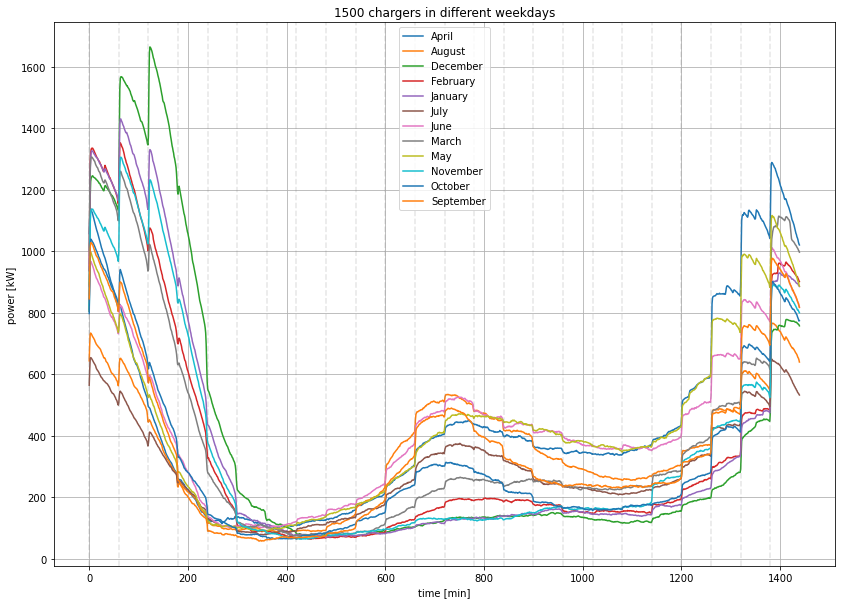

In [334]:
plt.figure(figsize=(14, 10))

plt.plot(month_sum_df_1500[1440*0:1440*1]['power(kW)'].values, label='April')
plt.plot(month_sum_df_1500[1440*1:1440*2]['power(kW)'].values, label='August')
plt.plot(month_sum_df_1500[1440*2:1440*3]['power(kW)'].values, label='December')
plt.plot(month_sum_df_1500[1440*3:1440*4]['power(kW)'].values, label='February')
plt.plot(month_sum_df_1500[1440*4:1440*5]['power(kW)'].values, label='January')
plt.plot(month_sum_df_1500[1440*5:1440*6]['power(kW)'].values, label='July')
plt.plot(month_sum_df_1500[1440*6:1440*7]['power(kW)'].values, label='June')
plt.plot(month_sum_df_1500[1440*7:1440*8]['power(kW)'].values, label='March')
plt.plot(month_sum_df_1500[1440*8:1440*9]['power(kW)'].values, label='May')
plt.plot(month_sum_df_1500[1440*9:1440*10]['power(kW)'].values, label='November')
plt.plot(month_sum_df_1500[1440*10:1440*11]['power(kW)'].values, label='October')
plt.plot(month_sum_df_1500[1440*11:1440*12]['power(kW)'].values, label='September')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

#plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

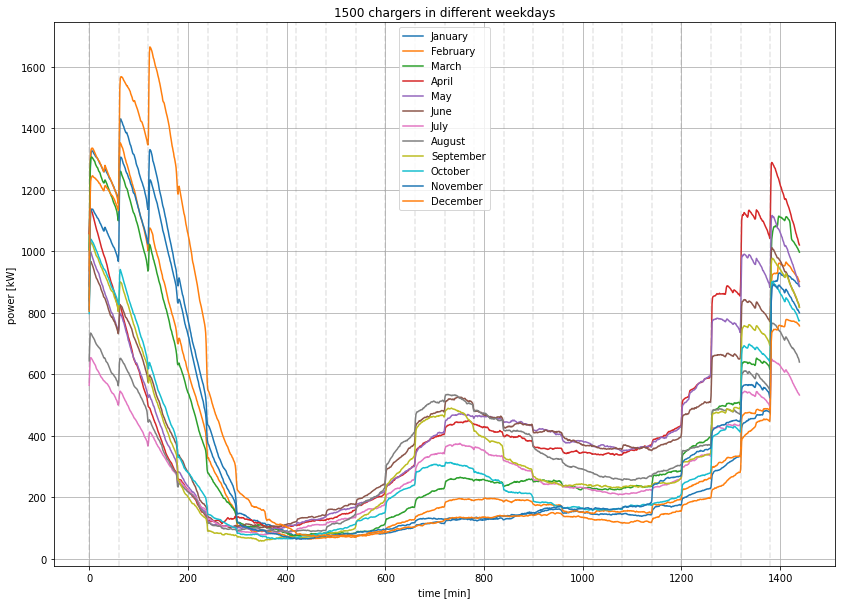

In [335]:
plt.figure(figsize=(14, 10))

plt.plot(month_sum_df_1500[1440*4:1440*5]['power(kW)'].values, label='January')
plt.plot(month_sum_df_1500[1440*3:1440*4]['power(kW)'].values, label='February')
plt.plot(month_sum_df_1500[1440*7:1440*8]['power(kW)'].values, label='March')
plt.plot(month_sum_df_1500[1440*0:1440*1]['power(kW)'].values, label='April')
plt.plot(month_sum_df_1500[1440*8:1440*9]['power(kW)'].values, label='May')
plt.plot(month_sum_df_1500[1440*6:1440*7]['power(kW)'].values, label='June')
plt.plot(month_sum_df_1500[1440*5:1440*6]['power(kW)'].values, label='July')
plt.plot(month_sum_df_1500[1440*1:1440*2]['power(kW)'].values, label='August')
plt.plot(month_sum_df_1500[1440*11:1440*12]['power(kW)'].values, label='September')
plt.plot(month_sum_df_1500[1440*10:1440*11]['power(kW)'].values, label='October')
plt.plot(month_sum_df_1500[1440*9:1440*10]['power(kW)'].values, label='November')
plt.plot(month_sum_df_1500[1440*2:1440*3]['power(kW)'].values, label='December')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

#plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

In [336]:
season_sum_df_1500

connected (1 or 0)   power(kW)
week season week min                                
Summer      1                 376.456044  805.612041
            2                 376.401099  866.470482
            3                 376.357143  912.356389
            4                 376.401099  917.888016
            5                 376.357143  915.716989
...                                  ...         ...
Winter      1436              345.125683  862.984393
            1437              345.142077  860.920943
            1438              345.180328  857.393364
            1439              345.180328  854.096530
            1440              345.213115  851.572225

[2880 rows x 2 columns]

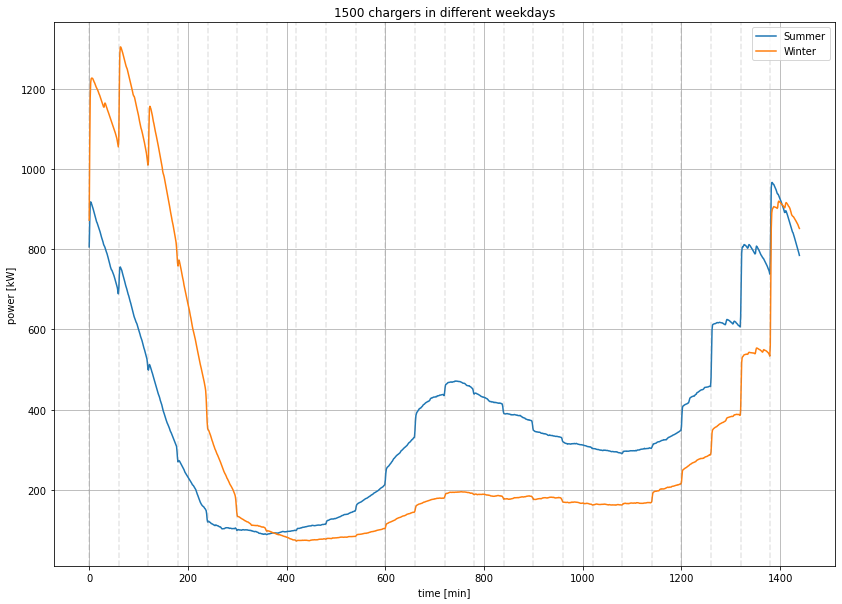

In [359]:
plt.figure(figsize=(14, 10))

plt.plot(season_sum_df_1500[1440*0:1440*1]['power(kW)'].values, label='Summer')
plt.plot(season_sum_df_1500[1440*1:1440*2]['power(kW)'].values, label='Winter')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

#plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

In [353]:
season_4_sum_df_1500

connected (1 or 0)    power(kW)
week season 4 week min                                 
Fall          1                 323.131868   817.679705
              2                 323.098901   938.523727
              3                 323.076923  1039.134972
              4                 323.098901  1062.859355
              5                 323.098901  1066.383394
...                                    ...          ...
Winter        1436              350.744444   856.954106
              1437              350.733333   854.906849
              1438              350.833333   851.851808
              1439              350.855556   849.450622
              1440              350.877778   846.227635

[5760 rows x 2 columns]

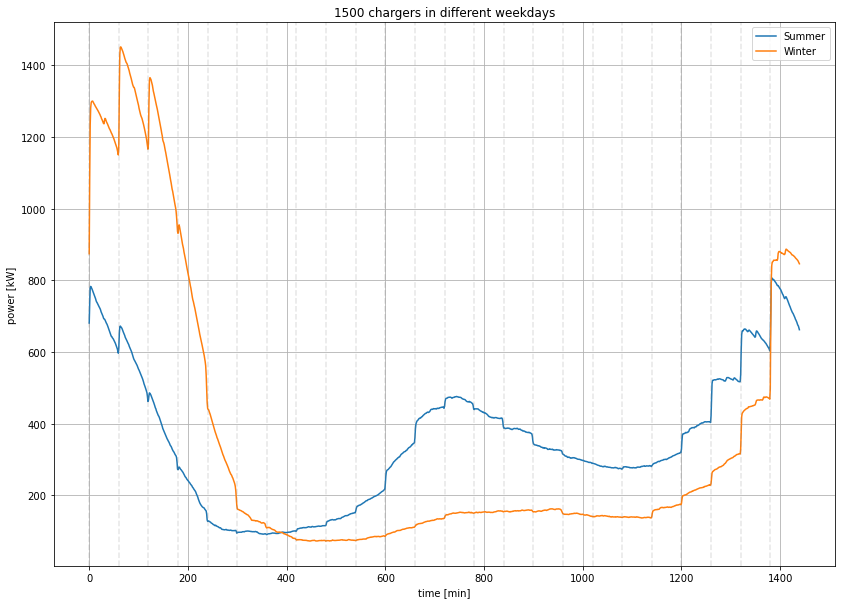

In [361]:
plt.figure(figsize=(14, 10))

#plt.plot(season_4_sum_df_1500[1440*0:1440*1]['power(kW)'].values, label='Fall')
#plt.plot(season_4_sum_df_1500[1440*1:1440*2]['power(kW)'].values, label='Spring')
plt.plot(season_4_sum_df_1500[1440*2:1440*3]['power(kW)'].values, label='Summer')
plt.plot(season_4_sum_df_1500[1440*3:1440*4]['power(kW)'].values, label='Winter')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

#plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

In [356]:
season_4_sum_df_1500[1440*2:1440*3].mean()

connected (1 or 0)    244.246754
power(kW)             351.026127
dtype: float64

In [357]:
season_4_sum_df_1500[1440*3:1440*4].mean()

connected (1 or 0)    235.706767
power(kW)             355.494984
dtype: float64

# Plot 6 - daily difference between aggregating sizes

In [ ]:
plt.plot(sum_df_1500[1440*1*5:1440*1*6]['power(kW)'].values/len(dataframes[0:1500]), label='1500 agg. power average [kW]')
plt.plot(sum_df_150[1440*1*5:1440*1*6]['power(kW)'].values/len(dataframes[0:150]), label='150 agg. power average [kW]')
plt.plot(sum_df_15[1440*1*5:1440*1*6]['power(kW)'].values/len(dataframes[0:15]), label='15 agg. power average [kW]')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers vs 150 chargers vs 15 chargers - Monday 28/03/2022")
plt.legend()
plt.grid(True)
plt.show()

# Plot 7 - Difference in connections during a random week

NameError: name 'FuncFormatter' is not defined

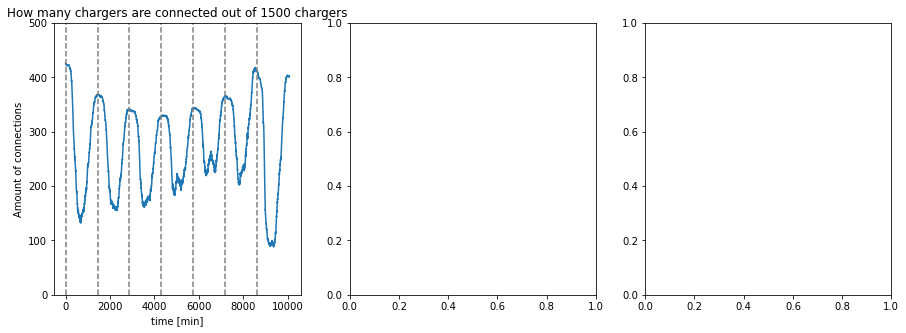

In [60]:
def format_func(value, tick_number):
    return f'{value / (60*24):.2f}d'

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(sum_df_1500[1440*7*3:1440*7*4]['connected (1 or 0)'].values)

for i in range(0, 1440*7, 1440):
    axs[0].axvline(x=i, color='grey', linestyle='--')
axs[0].set_ylim(0,500)
axs[0].set_xlabel('time [min]')
axs[0].set_ylabel('Amount of connections')
axs[0].set_title("How many chargers are connected out of 1500 chargers")
axs[0].xaxis.set_major_formatter(FuncFormatter(format_func))

axs[0].grid(True)


axs[1].plot(sum_df_150[1440*7*3:1440*7*4]['connected (1 or 0)'].values, color = 'green')

for i in range(0, 1440*7, 1440):
    axs[1].axvline(x=i, color='grey', linestyle='--')
axs[1].set_ylim(0,60)
axs[1].set_xlabel('time [min]')
axs[1].set_ylabel('Amount of connections')
axs[1].set_title("How many chargers are connected out of 150 chargers")
axs[1].grid(True)


axs[2].plot(sum_df_15[1440*7*3:1440*7*4]['connected (1 or 0)'].values, color = 'red')

for i in range(0, 1440*7, 1440):
    axs[2].axvline(x=i, color='grey', linestyle='--')
axs[2].set_ylim(0,10)
axs[2].set_xlabel('time [min]')
axs[2].set_ylabel('Amount of connections')
axs[2].set_title("How many chargers are connected out of 15 chargers")
axs[2].grid(True)


# Adjust the layout so that plots are not overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create some example data
x = [i for i in range(0, 301, 60)]  # minutes from 0 to 300
y = [1, 2, 3, 4, 5, 6]

# Define a function to convert minutes to days for the x-axis labels
def format_func(value, tick_number):
    return f'{value / (60*24):.2f}d'

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot data with x values in minutes
ax.plot(x, y)

# Set labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Y values')
ax.set_title('Plot with X-axis in Days')

# Set x-axis formatter
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

# Display the plot
plt.show()

# plots to "synergy effect of aggregating"

In [12]:
df_50_vs_500 = pd.read_csv(r"C:\Users\ASUS\Documents\11. sem - kand\github\Thesis\3. Simulations\Stochastic results\50x10_vs_500.csv")
df_50_vs_500

x1         x2     x3     x4     x5     x6     x7     x8     x9   
0     6154.266382   2.214469  0.006  0.134  0.006  0.136  0.907  0.537  0.999  \
1     6348.617800   7.938669  0.021  0.146  0.005  0.153  0.843  0.599  0.999   
2    15418.936818   0.825074  0.007  0.126  0.005  0.132  0.758  0.443  0.995   
3     6611.278054   0.246695  0.009  0.153  0.003  0.157  0.842  0.570  1.000   
4     6092.158477   0.815508  0.022  0.145  0.007  0.150  0.886  0.594  0.999   
5     9077.184119   1.273241  0.016  0.128  0.006  0.133  0.921  0.573  0.999   
6     8132.050028   1.452011  0.021  0.169  0.009  0.173  0.932  0.579  0.999   
7    11754.940572  13.229413  0.015  0.138  0.004  0.143  0.900  0.603  0.996   
8    11571.594507   0.044285  0.003  0.105  0.005  0.109  0.860  0.514  0.996   
9    16767.204442   1.859440  0.023  0.157  0.008  0.167  0.746  0.577  0.997   
10  446509.281815   0.000000  0.012  0.080  0.002  0.090  0.225  0.326  0.987   

      x10  x11  x12    x13       x14       x15  
0   0.005  0.0  0.0  0.000  1511.898  1843.851  
1   0.007  0.0  0.0  0.000   263.564   552.221  
2   0.000  0.0  0.0  0.000   282.116   554.459  
3   0.002  0.0  0.0  0.000   241.076   514.029  
4   0.011  0.0  0.0  0.000   222.476   479.491  
5   0.006  0.0  0.0  0.000   269.008   532.530  
6   0.006  0.0  0.0  0.000   221.769   482.896  
7   0.007  0.0  0.0  0.000   254.577   522.348  
8   0.000  0.0  0.0  0.000   270.796   539.981  
9   0.002  0.0  0.0  0.001   271.145   529.427  
10  0.000  0.0  0.0  0.001   324.644  1626.558

In [15]:
print(sum(df_50_vs_500["x1"][0:10]))
print(df_50_vs_500["x1"][10])
print("you increase your profit by: ", 100*df_50_vs_500["x1"][10]/sum(df_50_vs_500["x1"][0:10]), "%")

97928.23119888635
446509.2818150079
you increase your profit by:  455.95562826839426 %
